In [2]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt


Text(0, 0.5, 'qwerty dimension 2')

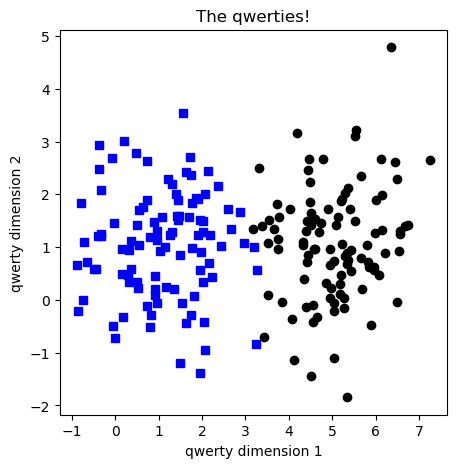

In [3]:
# Create the data
# create data
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

# generate data
a = [ A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [ B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

# concat into matrix
data_np = np.hstack((a,b)).T

# convert
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')

In [4]:
def createANNModel(learningRate):
    # model architecture
    ANNClassify = nn.Sequential(
        nn.Linear(2,1), # input, 2 features (x,y)
        nn.ReLU(),      # activation unit
        nn.Linear(1,1), # output unit - one output
        #nn.Sigmoid()    # final activation unit
    )

    lossfun = nn.BCEWithLogitsLoss() # Binary Cross Entropy
 
    # optimizer Stochastic Gradient Descent
    optimizer = torch.optim.SGD(ANNClassify.parameters(), lr=learningRate)

    return ANNClassify, lossfun, optimizer

In [5]:
# Function to train the model

numepochs = 1000

def trainTheModel(ANNModel):
    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):
        yHat = ANNModel(data)
        loss = lossfun(yHat, labels)
        losses[epochi] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    
    predictions = ANNModel(data)
    totalacc = 100*torch.mean(((predictions>0) == labels).float())

    return losses, predictions, totalacc

Final accuracy: 93.5%


Text(0, 0.5, 'Loss')

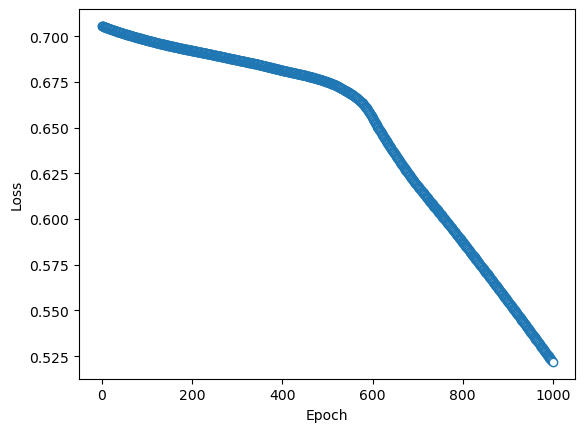

In [6]:
# execute the model
ANNClasify, lossfun, optimizer = createANNModel(0.01)

losses, predictions, totalacc = trainTheModel(ANNClasify)

print('Final accuracy: %g%%' %totalacc)

# show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [7]:
# Experiment
learningrates = np.linspace(.001, .1, 40)

accByLR = []
allLosses = np.zeros((len(learningrates), numepochs))

for i,lr in enumerate(learningrates):
    ANNClasify, lossfun, optimizer = createANNModel(lr)
    losses, predictions, totalacc = trainTheModel(ANNClasify)

    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()

Text(0, 0.5, 'Loss')

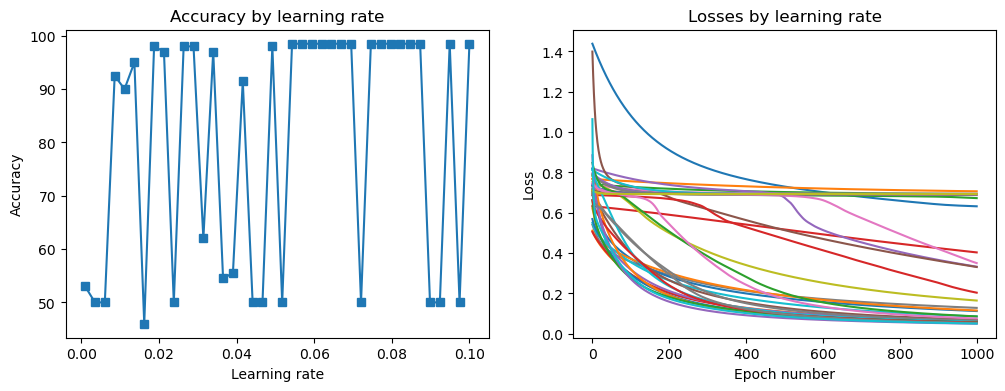

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(learningrates, accByLR, 's-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')


Text(0.5, 1.0, 'Accuracy by learning rate')

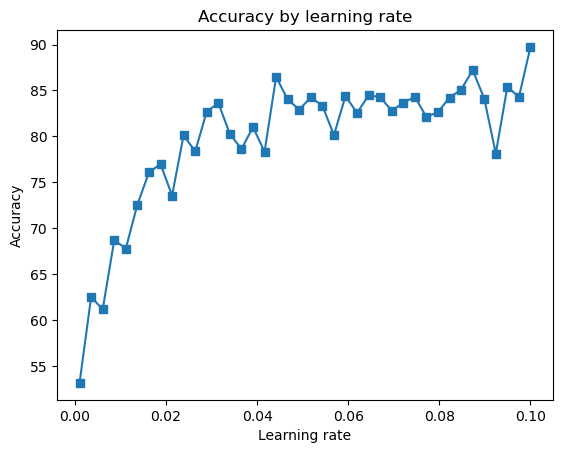

In [11]:
# run the above for 50 times and average the results
numExps = 50
accMeta = np.zeros((numExps, len(learningrates)))

numepochs = 500

for expi in range(numExps):
    for i, lr in enumerate(learningrates):
        ANNClasify, lossfun, optimizer = createANNModel(lr)
        losses, predictions, totalacc = trainTheModel(ANNClasify)

        accMeta[expi, i] = totalacc


# plot results
plt.plot(learningrates, np.mean(accMeta, axis=0), 's-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
